In [1]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
k=3
# filepath = '../imgs/flight.png'
# filepath = '../imgs/otk.png'
filepath = '../imgs/oranges.png'
# filepath = '../imgs/flowers.png'
# filepath = '../imgs/batman.PNG'
# filepath = '../imgs/pexels-cmonphotography-1809644.png'
image = img.imread(filepath)
nrows, ncols, ncolors = image.shape
image.shape

(1293, 970, 3)

In [3]:
im = np.array(image[:,:,0:3])
nrows, ncols, ncolors = im.shape
im_arr = np.reshape(im, (nrows*ncols, 3)) 
df = pd.DataFrame(im_arr, columns=['red', 'green', 'blue'])
 
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
 

In [4]:
cluster_centers, labels = kmeans2(df[['scaled_red',
                                      'scaled_green',
                                      'scaled_blue']], k=k)

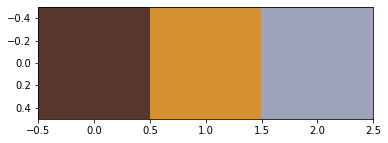

In [5]:
dominant_colors = []

rgb_std  = np.expand_dims(df[['red', 'green', 'blue']].std(), axis=0)
dominant_colors = cluster_centers*rgb_std
 
plt.imshow([dominant_colors])
plt.show()

In [6]:
kmeans = KMeans(k, max_iter=10, tol=1e-1).fit(df[['scaled_red','scaled_green','scaled_blue']])

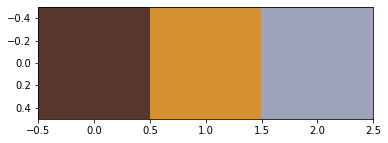

In [7]:
rgb_std  = np.expand_dims(df[['red', 'green', 'blue']].std(), axis=0)
dominant_colors_sk = kmeans.cluster_centers_*rgb_std
 
plt.imshow([dominant_colors])
plt.show()

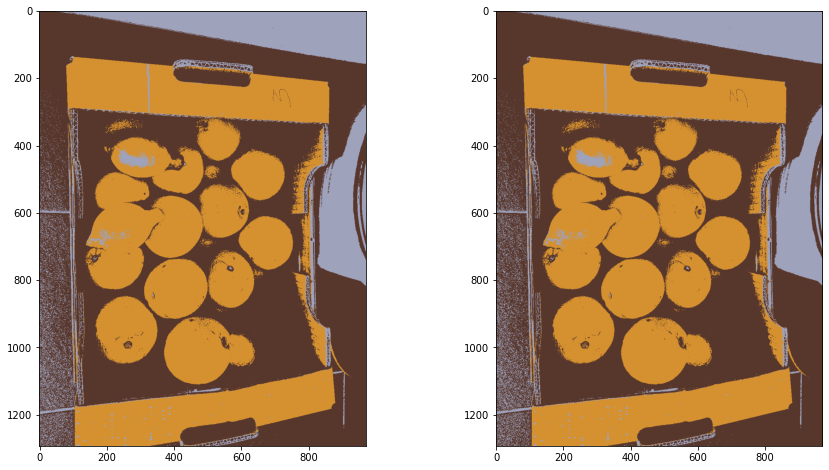

In [8]:
fname = filepath.split('/')[-1].split('.')
path = filepath[0:-len(filepath.split('/')[-1])]
new_fname = '.'.join([''.join(fname[0:-1] + ['_kmeans-{}'.format(k)]), fname[-1]])


new_im = np.array(dominant_colors)[labels].reshape((nrows,ncols,3))
new_im_sk = np.array(dominant_colors_sk)[kmeans.labels_].reshape((nrows,ncols,3))


fig, axs = plt.subplots(1,2, figsize=(15,8))
axs[0].imshow(new_im)
axs[1].imshow(new_im)
# plt.savefig(path+new_fname)
plt.show()

In [9]:
i=Image.fromarray(np.uint8(new_im*255))
i.save(path+new_fname)